In [2]:
import os
import glob
import cv2
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats



%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Train data

In this competition, you are asked to develop models that can efficiently retrieve landmark images from a large database. 
The training set is available in the train/ folder, with corresponding landmark labels in train.csv. 

In [7]:
train_df = pd.read_csv('../input/landmark-retrieval-2020/train.csv')
print('Number of unique landmark_ids: {}'.format(train_df['landmark_id'].nunique()))
train_df

Number of unique landmark_ids: 2916


id  landmark_id
0     00024ea6140f4221          136
1     0064acfa759f4153          192
2     007ff8952d3bbb20          389
3     002cf77393f82b81          392
4     002d022dd6eff825          392
...                ...          ...
3142  002bd182efc32595       202723
3143  00149309c59d185f       202752
3144  0064ecfae82480a0       202886
3145  0006bd092b119041       202939
3146  001e45514ceb27c9       202972

[3147 rows x 2 columns]

### Landmark_id distribuition

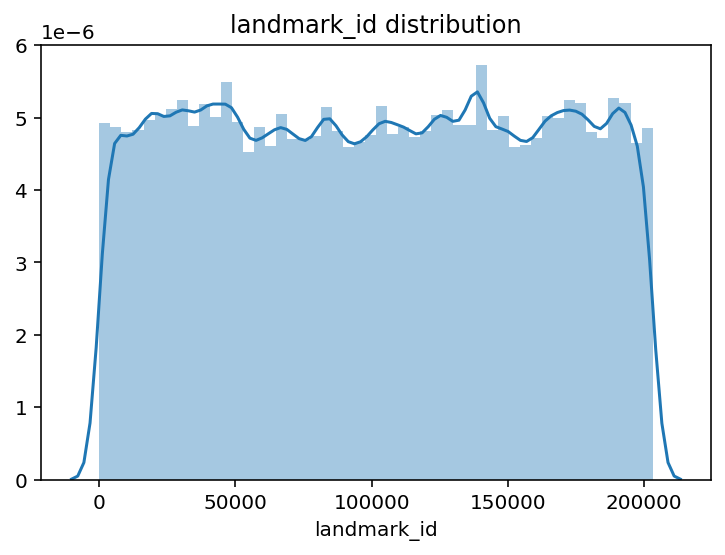

In [4]:
plt.title('landmark_id distribution')
sns.distplot(train_df['landmark_id'])

### Training set: number of images per class(line plot)



[Text(0, 0.5, 'Number of images'), Text(0.5, 0, 'Landmarks')]

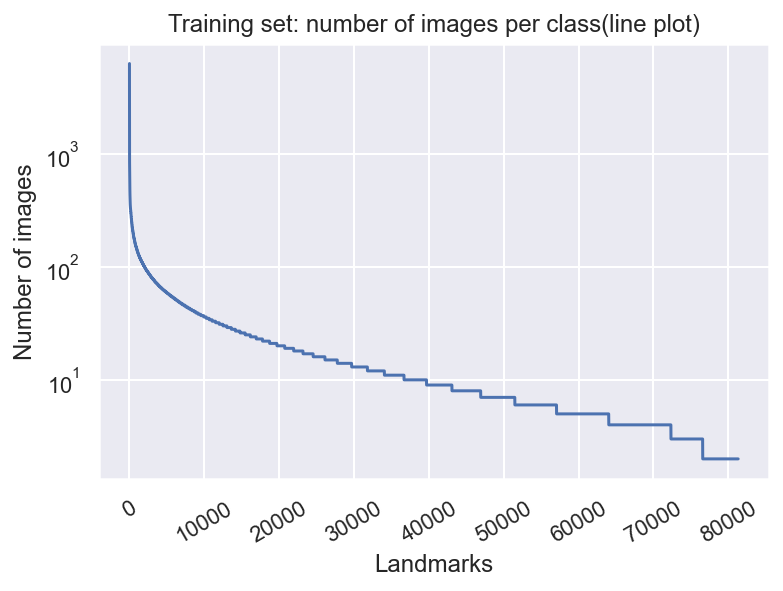

In [5]:
sns.set()
plt.title('Training set: number of images per class(line plot)')
landmarks_fold = pd.DataFrame(train_df['landmark_id'].value_counts())
landmarks_fold.reset_index(inplace=True)
landmarks_fold.columns = ['landmark_id','count']
ax = landmarks_fold['count'].plot(logy=True, grid=True)
locs, labels = plt.xticks()
plt.setp(labels, rotation=30)
ax.set(xlabel="Landmarks", ylabel="Number of images")

### Training set: number of images per class(scatter plot)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


[Text(0, 0.5, 'Number of images'), Text(0.5, 0, 'Landmarks')]

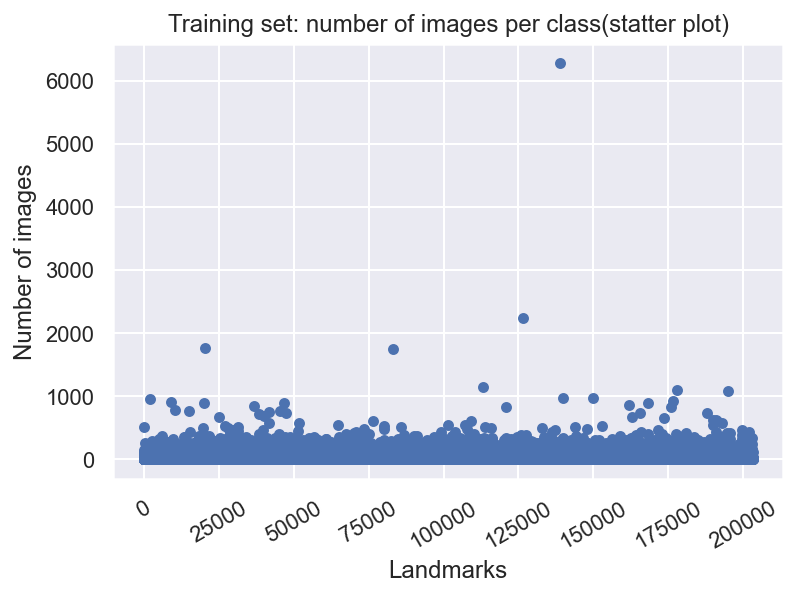

In [6]:
sns.set()
landmarks_fold_sorted = pd.DataFrame(train_df['landmark_id'].value_counts())
landmarks_fold_sorted.reset_index(inplace=True)
landmarks_fold_sorted.columns = ['landmark_id','count']
landmarks_fold_sorted = landmarks_fold_sorted.sort_values('landmark_id')
ax = landmarks_fold_sorted.plot.scatter(\
     x='landmark_id',y='count',
     title='Training set: number of images per class(statter plot)')
locs, labels = plt.xticks()
plt.setp(labels, rotation=30)
ax.set(xlabel="Landmarks", ylabel="Number of images")

## 1.2 Test and Index data

The query images are listed in the test/ folder, while the "index" images from which you are retrieving are listed in index/. 

Each image has a unique id. Since there are a large number of images, each image is placed within three subfolders according to the first three characters of the image id (i.e. image abcdef.jpg is placed in a/b/c/abcdef.jpg).

0-f in 0-f in 0-f

In [7]:
test_list = glob.glob('../input/landmark-retrieval-2020/test/*/*/*/*')
index_list = glob.glob('../input/landmark-retrieval-2020/index/*/*/*/*')

In [8]:
print( 'Query', len(test_list), ' test images in ', len(index_list), 'index images')

Query 0  test images in  0 index images


## 1.3 Display examples

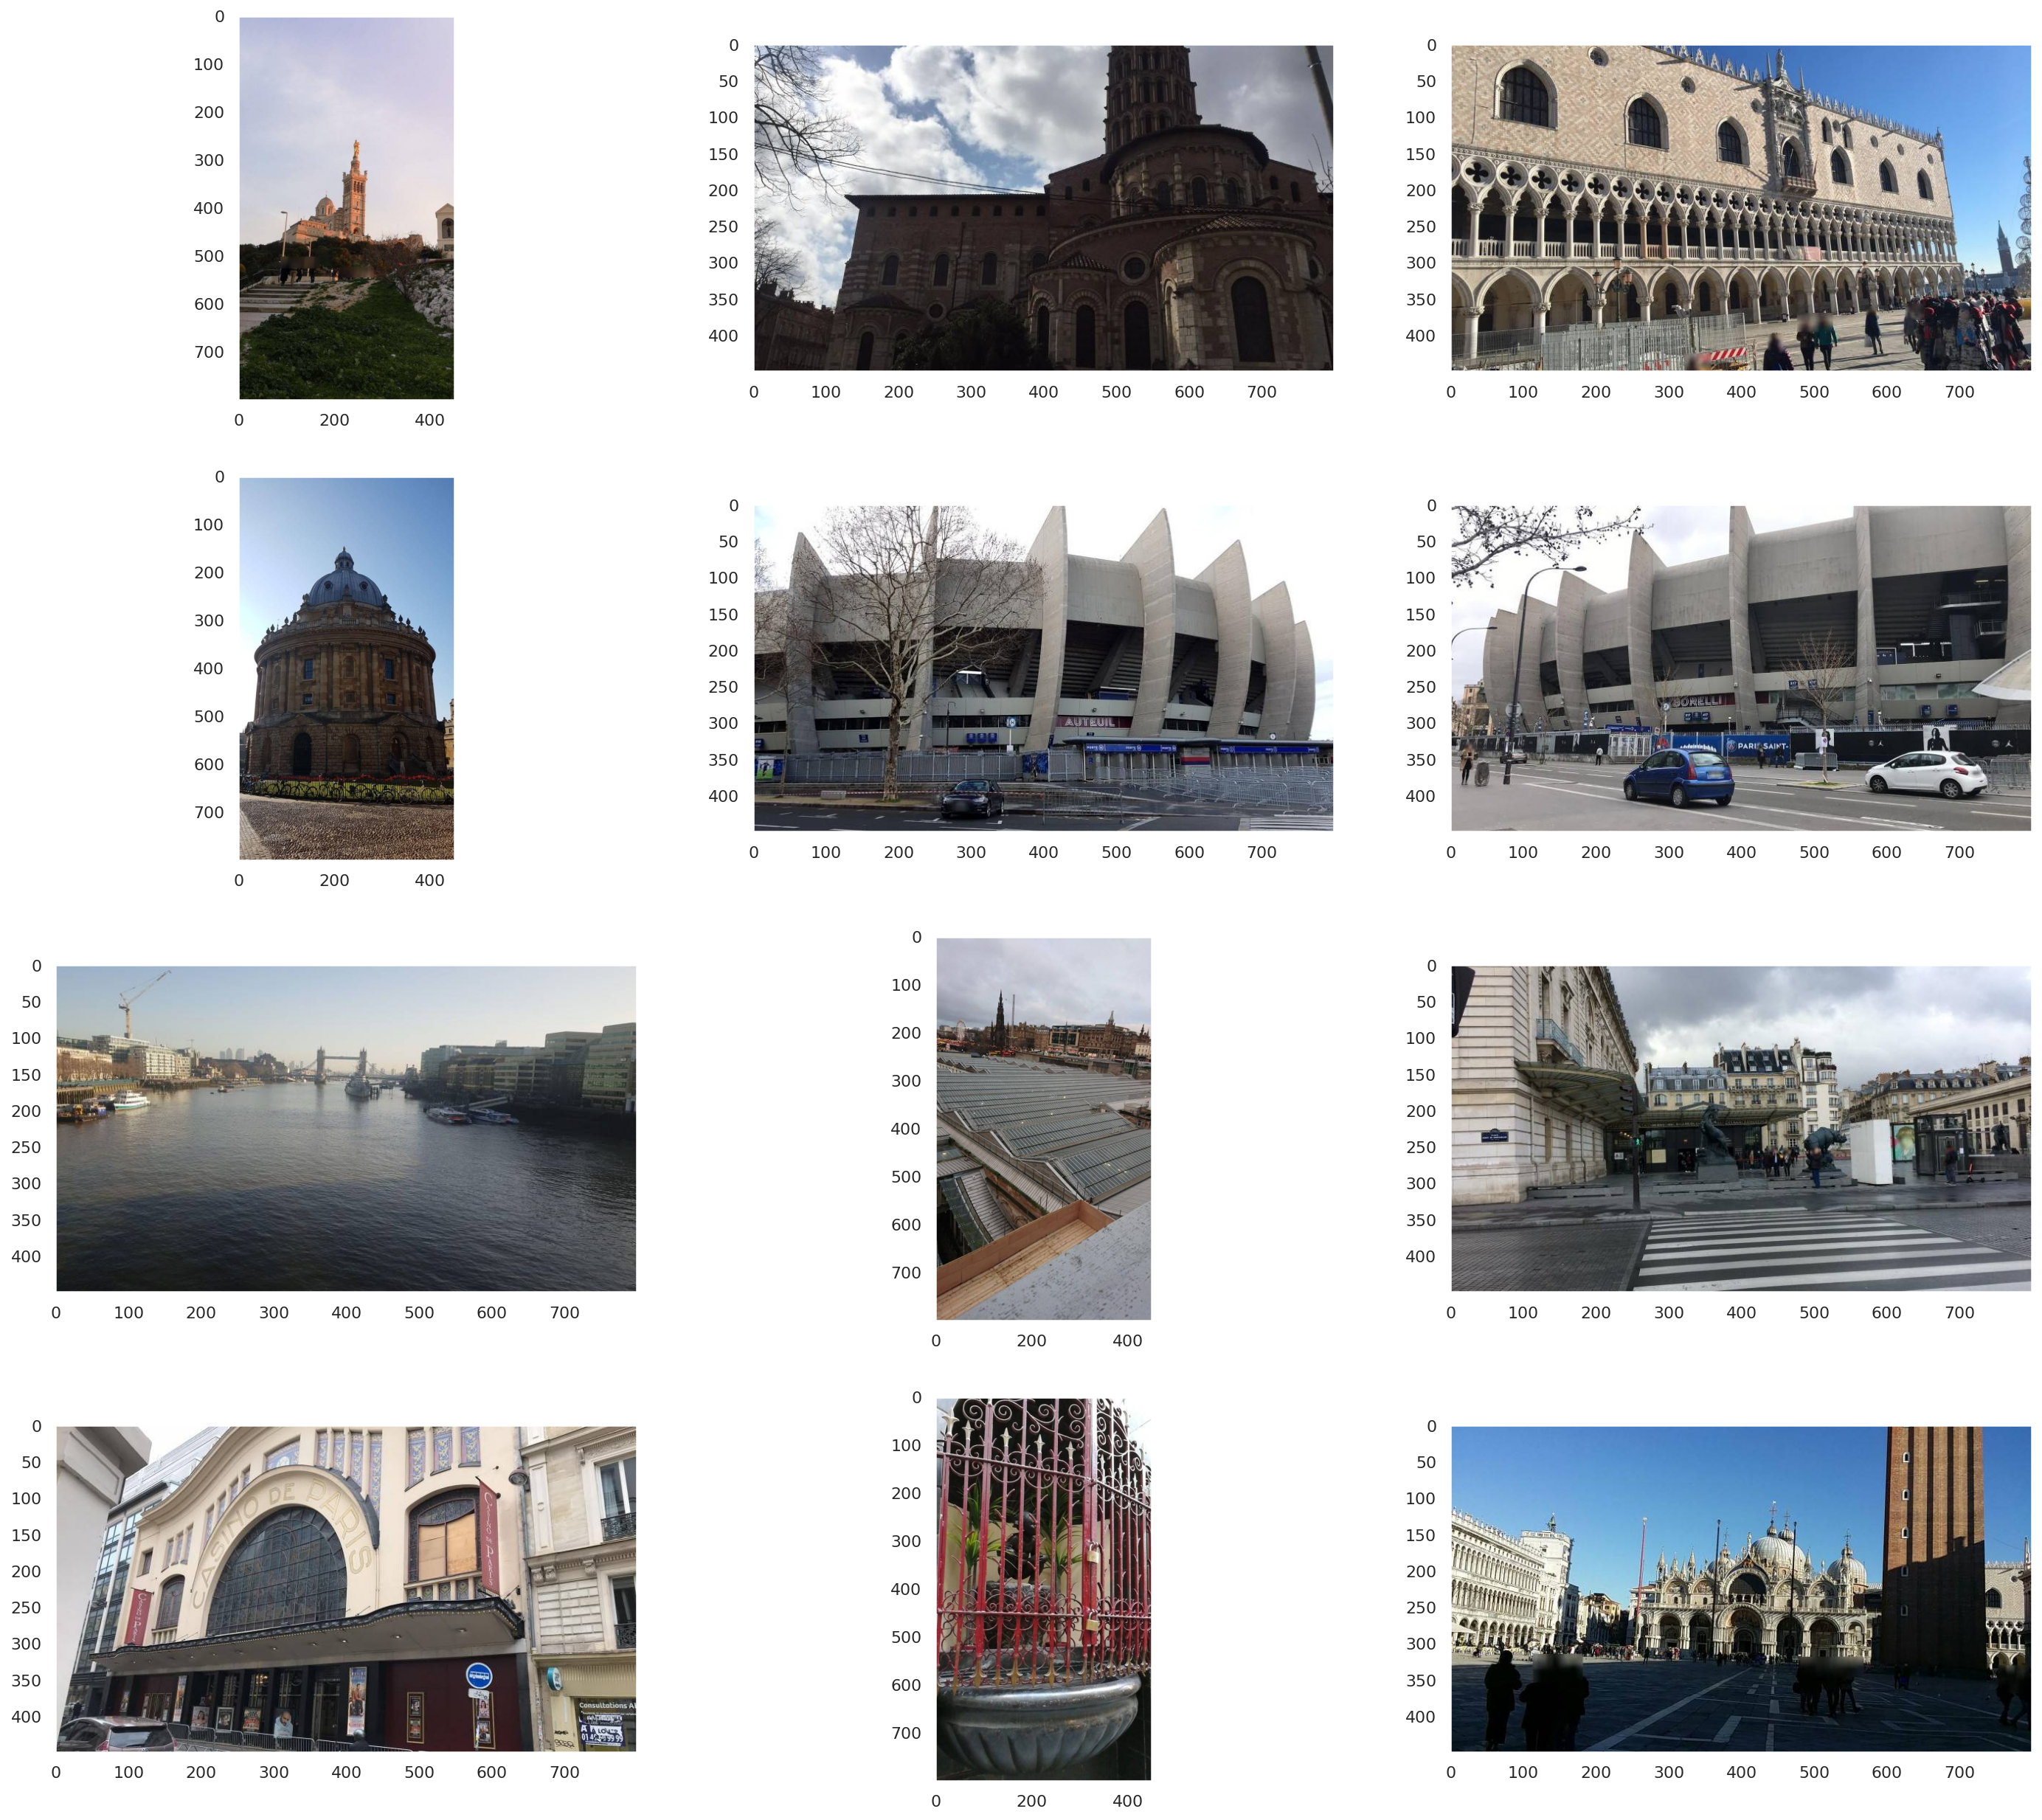

In [8]:
plt.rcParams["axes.grid"] = False
f, axarr = plt.subplots(4, 3, figsize=(24, 22))

curr_row = 0
for i in range(12):
    example = cv2.imread(test_list[i])
    example = example[:,:,::-1]
    
    col = i%4
    axarr[col, curr_row].imshow(example)
    if col == 3:
        curr_row += 1
            
#     plt.imshow(example)
#     plt.show()